# Group 5 - Project 1

Marshall Morris  
Jon Nistler

## Import Data


In [45]:
#%pip install ipywidgets
#%pip install geopy
#%pip install tqdm>=4.9.0
#%pip install plotly

#Marshall
import numpy as np
import pandas as pd

#Graphing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Machine learning 
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#Geocodeing
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from tqdm.notebook import tqdm

#Nistler abc
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.cluster import KMeans

### Restaurants 

In [46]:
#Nistler

#Import restaurants, sheet 1
restaurants = pd.read_excel('restaurants.xlsx', sheet_name = 'RESTAURANTS NEAR WSU')
display(restaurants)

,RESTAURANT NAME,DISTANCE FROM WSU,ADDRESS,MONDAY,TUESDAY,WEDNESDAY,THURSDAY,FRIDAY,SATURDAY,SUNDAY,TYPE,Ratings
0,Social Tap Drinkery,0.30,"4510 E 19th St N Suite #101, Wichita, KS 67208",11AM-11PM,11AM-11PM,11AM-11PM,11AM-11PM,11AM-11PM,11AM-11PM,11AM-8PM,Bar and restaurant,NaN
1,sonic drive in,0.05,"2939 E 21st St N, Wichita, KS 67214",6AM-11PM,6AM-11PM,6AM-11PM,6AM-11PM,6AM-11PM,7AM-11PM,7AM-11PM,Fast Food restaurant,NaN
2,Sungrano,0.30,"4510 E 19th St N Suite #101, Wichita, KS 67208",11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-8PM,Pizza restaurant,NaN
3,Fuzz's taco shop,0.30,"4521 E 21st St N Suite 107, Wichita, KS 67208",10:30AM-10:30PM,10:30AM-10:30PM,10:30AM-10:30PM,10:30AM-11PM,10:30AM-11PM,10:30AM-11PM,11AM-8PM,Tex-Mex resaurant,NaN
4,El papa pollo restaurant,0.50,"4717 E 13th St N, Wichita, KS 67208",10:30AM-9PM,10:30AM-9PM,10:30AM-9PM,10:30AM-9PM,10:30AM-9PM,10:30AM-9PM,10:30AM-9PM,Mexican restaurant,NaN
5,Magnolia café wichita,1.30,"2424 N Woodlawn Blvd #111, Wichita, KS 67220",0,11AM-9PM,11AM-9PM,11AM-9PM,11AM-9PM,"9AM-2PM,5-9PM",9AM-2PM,café,NaN
6,chick-fil-A,0.40,"Rhatigan Student Center, 1845 Fairmount St, Wi...",6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,0,Fast Food restaurant,NaN
7,prost,1.80,"2721 E Central Ave #101, Wichita, KS 67214",0,11AM-9PM,11AM-9PM,11AM-9PM,11AM-9PM,11AM-9PM,0,German restaurant,NaN
8,Five guys,3.40,"2929 N Rock Rd Suite 110, Wichita, KS 67226",11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,Fast Food restaurant,NaN
9,Georges french bistro,1.60,"4618 E Central Ave #50, Wichita, KS 67208",4PM-10PM,4PM-10PM,4PM-10PM,4PM-10PM,4PM-10PM,4PM-11PM,0,french restaurant,NaN


### Data Cleaning

In [47]:
#Nistler
restaurants.info()
restaurants
restaurants.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RESTAURANT NAME    57 non-null     object 
 1   DISTANCE FROM WSU  57 non-null     float64
 2   ADDRESS            57 non-null     object 
 3   MONDAY             56 non-null     object 
 4   TUESDAY            56 non-null     object 
 5   WEDNESDAY          56 non-null     object 
 6   THURSDAY           56 non-null     object 
 7   FRIDAY             56 non-null     object 
 8   SATURDAY           56 non-null     object 
 9   SUNDAY             56 non-null     object 
 10  TYPE               57 non-null     object 
 11  Ratings            0 non-null      float64
dtypes: float64(2), object(10)
memory usage: 5.5+ KB


(57, 12)

In [48]:
#Marshall
#remove = El papa pollo restaurant(closed perminantly), Albero café	(temp_closed), Dragon express	(temporialy closed), Clouds bar & lounge	(perminaly closed), Pam's wings with things (perminaly closed), Himali Eats	(perminaly closed),
remove_restraunts =["El papa pollo restaurant", "Albero café", "Dragon express", "Clouds bar & lounge", "Pam's wings with things", "Himali Eats"]
restaurants = restaurants[~restaurants['RESTAURANT NAME'].isin(remove_restraunts)]
#remove rating column and will add new column in next step
restaurants = restaurants.drop("Ratings", axis =1)

print(remove_restraunts)
restaurants

['El papa pollo restaurant', 'Albero café', 'Dragon express', 'Clouds bar & lounge', "Pam's wings with things", 'Himali Eats']


,RESTAURANT NAME,DISTANCE FROM WSU,ADDRESS,MONDAY,TUESDAY,WEDNESDAY,THURSDAY,FRIDAY,SATURDAY,SUNDAY,TYPE
0,Social Tap Drinkery,0.30,"4510 E 19th St N Suite #101, Wichita, KS 67208",11AM-11PM,11AM-11PM,11AM-11PM,11AM-11PM,11AM-11PM,11AM-11PM,11AM-8PM,Bar and restaurant
1,sonic drive in,0.05,"2939 E 21st St N, Wichita, KS 67214",6AM-11PM,6AM-11PM,6AM-11PM,6AM-11PM,6AM-11PM,7AM-11PM,7AM-11PM,Fast Food restaurant
2,Sungrano,0.30,"4510 E 19th St N Suite #101, Wichita, KS 67208",11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-8PM,Pizza restaurant
3,Fuzz's taco shop,0.30,"4521 E 21st St N Suite 107, Wichita, KS 67208",10:30AM-10:30PM,10:30AM-10:30PM,10:30AM-10:30PM,10:30AM-11PM,10:30AM-11PM,10:30AM-11PM,11AM-8PM,Tex-Mex resaurant
5,Magnolia café wichita,1.30,"2424 N Woodlawn Blvd #111, Wichita, KS 67220",0,11AM-9PM,11AM-9PM,11AM-9PM,11AM-9PM,"9AM-2PM,5-9PM",9AM-2PM,café
6,chick-fil-A,0.40,"Rhatigan Student Center, 1845 Fairmount St, Wi...",6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,0,Fast Food restaurant
7,prost,1.80,"2721 E Central Ave #101, Wichita, KS 67214",0,11AM-9PM,11AM-9PM,11AM-9PM,11AM-9PM,11AM-9PM,0,German restaurant
8,Five guys,3.40,"2929 N Rock Rd Suite 110, Wichita, KS 67226",11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,Fast Food restaurant
9,Georges french bistro,1.60,"4618 E Central Ave #50, Wichita, KS 67208",4PM-10PM,4PM-10PM,4PM-10PM,4PM-10PM,4PM-10PM,4PM-11PM,0,french restaurant
10,spangles,0.90,"6120 E 21st St N, Wichita, KS 67208",6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,7AM-10PM,Fast Food restaurant


In [49]:
#Nistler
#Which restaurants have generic "restaurant" as type
restaurants['RESTAURANT NAME'][restaurants['TYPE']=='Restaurant'] 

17             chicken chicken
24              Tad's carryout
31               Kababji grill
36    Just like Mama's Kitchen
37                Jason's Deli
41                 Burger King
45                 The Belmont
48          First Mile Kitchen
Name: RESTAURANT NAME, dtype: object

In [50]:
#Nistler
#Replace generic restaurant with something specific. Retrieved from google maps
restaurants.loc[restaurants['RESTAURANT NAME']=='chicken chicken','TYPE']='Fast food'
restaurants.loc[restaurants['RESTAURANT NAME']=='Tad\'s carryout','TYPE']='Fast food'
restaurants.loc[restaurants['RESTAURANT NAME']=='Kababji grill','TYPE']='Mideast Restaurant'
restaurants.loc[restaurants['RESTAURANT NAME']=='Just like Mama\'s Kitchen','TYPE']='American restaurant'
restaurants.loc[restaurants['RESTAURANT NAME']=='Jason\'s Deli','TYPE']='Sandwich shop'
restaurants.loc[restaurants['RESTAURANT NAME']=='Burger King','TYPE']='Fast food'
restaurants.loc[restaurants['RESTAURANT NAME']=='The Belmont','TYPE']='American restaurant'
restaurants.loc[restaurants['RESTAURANT NAME']=='First Mile Kitchen','TYPE']='American restaurant'

In [51]:
#Nistler
#Consolidate closely categorized restaurants
restaurants.replace({'TYPE':{'Fast food': 'Fast Food restaurant', 
                     'Bar and restaurant': 'Bar and Grill',
                    'Chinese restaurant':'East Asian restaurant',
                    'Asian restaurant':'East Asian restaurant',
                    'Malaysian restaurant':'East Asian restaurant',
                    'Ramen restaurant':'East Asian restaurant',
                    'Mangolian barbecue restaurant':'East Asian restaurant',
                    'Corndog Shop':'Fast Food restaurant',
                    'Chicken restaurant':'Fast Food restaurant',
                    'Hamburger restaurant':'American restaurant',
                    'Mediterranean restaurant':'European restaurant',
                    'Europen restaurant':'European restaurant',
                    'french restaurant':'European restaurant',
                    'Tex-Mex chain restaurant':'Mexican restaurant',
                    'Tex-Mex resaurant':'Mexican restaurant',
                    'soul food restaurant':'Cajun restaurant',
                    'Cajun  restaurant':'Cajun restaurant'}},inplace=True)

restaurants.groupby('TYPE')['TYPE'].count()

TYPE
American restaurant       6
Bar and Grill             3
Cajun restaurant          3
East Asian restaurant     7
European restaurant       3
Fast Food restaurant     13
German restaurant         1
Indian restaurant         2
Mexican restaurant        5
Mideast Restaurant        1
Pizza restaurant          2
Sandwich shop             2
café                      2
wine bar                  1
Name: TYPE, dtype: int64

In [52]:
#Marshall
restaurants.shape

(51, 11)

In [53]:
#Marshall
#Add New columns to the data for the analysis
restaurants['RATINGS_OUTOF5'] = [4.4,3.7,4.2,4.2, 4.3, 4.2, 4.6, 4.4, 4.7, 4.1, 3.8, 4.6, 4.3, 3.2, 4.7, 4.2, 4.5, 4.5, 5.0, 4.4, 4.6, 4.5, 4.3, 4.5, 4.3, 4.1, 4.7, 3.5, 3.6, 3.5, 3.4, 4.1, 4.5, 4.7, 3.9, 4.2, 3.0, 4.0, 3.8, 4.3, 4.6, 4.6, 4.4, 4.5, 4.2, 4.4, 4.5, 4.0, 4.6, 3.7, 4.3]
restaurants['NUM_REVIEWS'] = [260,1291, 18, 704, 291, 285, 1293, 1172, 1575, 661, 1909, 1895, 702, 1700, 580, 504, 843, 394, 97, 9, 67, 14, 17, 187, 893, 30, 88, 309, 16, 1057, 428, 172, 1087, 95, 208, 1398, 737, 225, 689, 1274, 544, 888, 228, 916, 1293, 2383, 1881, 1342, 731, 726, 247]
restaurants['MIN_COST'] = [10, 1,  np.nan, 10 ,10, 1, 10, 10, 50, 1, 10, 10, 10, 1, 10, 10, 20, 10, 10, 10, 10, np.nan, 1, 10, 10, np.nan, 10, 10, np.nan, 10, 1, 10, 10, 10, 10, 1, 1, 10, np.nan, 10, 10, np.nan, np.nan, 10, 10, 10, 20, 10, 10, 10, 10]
restaurants['MAX_COST'] = [20, 10, np.nan, 20, 20, 10, 20, 20, 100, 10, 20, 20, 20, 10, 20, 20, 30, 20, 20, 20, 20, np.nan, 10, 20, 20, np.nan, 20, 20, np.nan, 20, 10, 20, 20, 20, 20, 10, 10, 20, np.nan, 20, 20, np.nan, np.nan, 20, 20, 20, 30, 20, 20, 20, 20]
restaurants['ON_CAMPUS'] = [True, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]

restaurants

,RESTAURANT NAME,DISTANCE FROM WSU,ADDRESS,MONDAY,TUESDAY,WEDNESDAY,THURSDAY,FRIDAY,SATURDAY,SUNDAY,TYPE,RATINGS_OUTOF5,NUM_REVIEWS,MIN_COST,MAX_COST,ON_CAMPUS
0,Social Tap Drinkery,0.30,"4510 E 19th St N Suite #101, Wichita, KS 67208",11AM-11PM,11AM-11PM,11AM-11PM,11AM-11PM,11AM-11PM,11AM-11PM,11AM-8PM,Bar and Grill,4.4,260,10.0,20.0,True
1,sonic drive in,0.05,"2939 E 21st St N, Wichita, KS 67214",6AM-11PM,6AM-11PM,6AM-11PM,6AM-11PM,6AM-11PM,7AM-11PM,7AM-11PM,Fast Food restaurant,3.7,1291,1.0,10.0,False
2,Sungrano,0.30,"4510 E 19th St N Suite #101, Wichita, KS 67208",11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-8PM,Pizza restaurant,4.2,18,NaN,NaN,True
3,Fuzz's taco shop,0.30,"4521 E 21st St N Suite 107, Wichita, KS 67208",10:30AM-10:30PM,10:30AM-10:30PM,10:30AM-10:30PM,10:30AM-11PM,10:30AM-11PM,10:30AM-11PM,11AM-8PM,Mexican restaurant,4.2,704,10.0,20.0,True
5,Magnolia café wichita,1.30,"2424 N Woodlawn Blvd #111, Wichita, KS 67220",0,11AM-9PM,11AM-9PM,11AM-9PM,11AM-9PM,"9AM-2PM,5-9PM",9AM-2PM,café,4.3,291,10.0,20.0,False
6,chick-fil-A,0.40,"Rhatigan Student Center, 1845 Fairmount St, Wi...",6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,0,Fast Food restaurant,4.2,285,1.0,10.0,True
7,prost,1.80,"2721 E Central Ave #101, Wichita, KS 67214",0,11AM-9PM,11AM-9PM,11AM-9PM,11AM-9PM,11AM-9PM,0,German restaurant,4.6,1293,10.0,20.0,False
8,Five guys,3.40,"2929 N Rock Rd Suite 110, Wichita, KS 67226",11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,Fast Food restaurant,4.4,1172,10.0,20.0,False
9,Georges french bistro,1.60,"4618 E Central Ave #50, Wichita, KS 67208",4PM-10PM,4PM-10PM,4PM-10PM,4PM-10PM,4PM-10PM,4PM-11PM,0,European restaurant,4.7,1575,50.0,100.0,False
10,spangles,0.90,"6120 E 21st St N, Wichita, KS 67208",6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,7AM-10PM,Fast Food restaurant,4.1,661,1.0,10.0,False


In [54]:
#Marshall
# Add new data
#"RESTAURANT NAME" : , "DISTANCE FROM WSU":  ,	"ADDRESS" : ,	"MONDAY" : ,	"TUESDAY": ,	"WEDNESDAY" : ,	"THURSDAY" : ,	"FRIDAY" : ,	"SATURDAY" : ,	"SUNDAY" : ,	"TYPE" :  ,	"RATINGS_OUTOF5" : ,	"NUM_REVIEWS" : ,	"MIN_COST" : ,	"MAX_COST" : ,	"ON_CAMPUS" :
new_data = [ {"RESTAURANT NAME" : "Jersey Mike's Subs", "DISTANCE FROM WSU":  0.03,	"ADDRESS" : "4521 E 21st St N Suite 101, Wichita, KS 67208",	"MONDAY" : "10AM-9PM",	"TUESDAY": "10AM-9PM",	"WEDNESDAY" : "10AM-9PM",	"THURSDAY" : "10AM-9PM",	"FRIDAY" : "10AM-9PM",	"SATURDAY" : "10AM-9PM",	"SUNDAY" : "10AM-9PM",	"TYPE" : "Sandwich Shop" ,	"RATINGS_OUTOF5" : 4.2,	"NUM_REVIEWS" : 30,	"MIN_COST" : 10,	"MAX_COST" : 20,	"ON_CAMPUS" : True },
            {"RESTAURANT NAME" : "Two Hands Corn Dogs", "DISTANCE FROM WSU":  .03,	"ADDRESS" : "4510 E 19th St N Suite 106, Wichita, KS 67208",	"MONDAY" : "11AM-9PM",	"TUESDAY": "11AM-9PM",	"WEDNESDAY" : "11AM-9PM",	"THURSDAY" : "11AM-9PM",	"FRIDAY" : "11AM-9PM",	"SATURDAY" : "11AM-9PM",	"SUNDAY" : "11AM-9PM",	"TYPE" :  "Corndog Shop",	"RATINGS_OUTOF5" : 4.6,	"NUM_REVIEWS" : 65,	"MIN_COST" : 10,	"MAX_COST" : 20,	"ON_CAMPUS" : True}
             ]
restaurants = restaurants._append(new_data, ignore_index =True)
restaurants

,RESTAURANT NAME,DISTANCE FROM WSU,ADDRESS,MONDAY,TUESDAY,WEDNESDAY,THURSDAY,FRIDAY,SATURDAY,SUNDAY,TYPE,RATINGS_OUTOF5,NUM_REVIEWS,MIN_COST,MAX_COST,ON_CAMPUS
0,Social Tap Drinkery,0.30,"4510 E 19th St N Suite #101, Wichita, KS 67208",11AM-11PM,11AM-11PM,11AM-11PM,11AM-11PM,11AM-11PM,11AM-11PM,11AM-8PM,Bar and Grill,4.4,260,10.0,20.0,True
1,sonic drive in,0.05,"2939 E 21st St N, Wichita, KS 67214",6AM-11PM,6AM-11PM,6AM-11PM,6AM-11PM,6AM-11PM,7AM-11PM,7AM-11PM,Fast Food restaurant,3.7,1291,1.0,10.0,False
2,Sungrano,0.30,"4510 E 19th St N Suite #101, Wichita, KS 67208",11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-8PM,Pizza restaurant,4.2,18,NaN,NaN,True
3,Fuzz's taco shop,0.30,"4521 E 21st St N Suite 107, Wichita, KS 67208",10:30AM-10:30PM,10:30AM-10:30PM,10:30AM-10:30PM,10:30AM-11PM,10:30AM-11PM,10:30AM-11PM,11AM-8PM,Mexican restaurant,4.2,704,10.0,20.0,True
4,Magnolia café wichita,1.30,"2424 N Woodlawn Blvd #111, Wichita, KS 67220",0,11AM-9PM,11AM-9PM,11AM-9PM,11AM-9PM,"9AM-2PM,5-9PM",9AM-2PM,café,4.3,291,10.0,20.0,False
5,chick-fil-A,0.40,"Rhatigan Student Center, 1845 Fairmount St, Wi...",6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,0,Fast Food restaurant,4.2,285,1.0,10.0,True
6,prost,1.80,"2721 E Central Ave #101, Wichita, KS 67214",0,11AM-9PM,11AM-9PM,11AM-9PM,11AM-9PM,11AM-9PM,0,German restaurant,4.6,1293,10.0,20.0,False
7,Five guys,3.40,"2929 N Rock Rd Suite 110, Wichita, KS 67226",11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,Fast Food restaurant,4.4,1172,10.0,20.0,False
8,Georges french bistro,1.60,"4618 E Central Ave #50, Wichita, KS 67208",4PM-10PM,4PM-10PM,4PM-10PM,4PM-10PM,4PM-10PM,4PM-11PM,0,European restaurant,4.7,1575,50.0,100.0,False
9,spangles,0.90,"6120 E 21st St N, Wichita, KS 67208",6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,7AM-10PM,Fast Food restaurant,4.1,661,1.0,10.0,False


In [55]:
#Marshall
# Get the spans of time
restaurants_array = restaurants[['MONDAY', 'TUESDAY',	'WEDNESDAY',	'THURSDAY',	'FRIDAY',	'SATURDAY',	'SUNDAY']].T.values
restaurants_array = restaurants_array.flatten()
list_of_unique = pd.unique(restaurants_array)
list_of_unique = [str(s).replace('\u202f', '') if isinstance(s, str) else s for s in list_of_unique]
print(list_of_unique)

['11AM-11PM', '6AM-11PM', '11AM-10PM', '10:30AM-10:30PM', 0, '6:30AM-10PM', '4PM-10PM', '10:30AM-10PM', '4AM-11PM', '8AM-2AM', '10:30AM-9PM', '11AM-8PM', '11AM-3PM', 'Null', '10AM-7PM', ' 11AM–2:30PM', nan, '11AM-9PM', '7am-9pm', '7am-12pm', '10am-10pm', 'full day', '9am-10pm', '3PM-9PM', '10:45AM-10:30PM', '5PM-10PM', '10AM-9PM', '11AM–2:30PM, 5–9PM', '5AM-11PM', '4PM-8PM', '3PM-10PM', ' 11AM–3PM, 4–8PM', ' 11AM–2:30PM, 5–9PM', '6AM-10PM', '9AM-7PM', '10:30AM-9:30PM', '10:30AM-11PM', '12AM-11:59PM', '11AM-12AM', ' 11AM–2:30PM, 5–10PM', '10AM-5PM', '11AM-10:30PM', '11AM-1PM', '3PM-11PM', '5PM-11PM', '7AM-11PM', '9AM-2PM,5-9PM', '4PM-11PM', '10am-11pm', '10AM-11PM', '9AM-9PM', '9AM-2PM', '7AM-10PM', '10AM-3PM', '12pm-5pm', '9AM-8PM', '12PM-10PM']


In [56]:
#Marshall
""" Code to create list but some are 0 added them later
from datetime import datetime
import pandas as pd
# List of time slots
time_slots = [
    '11AM-11PM', '6AM-11PM', '11AM-10PM', '10:30AM-10:30PM', '6:30AM-10PM', '4PM-10PM', '10:30AM-10PM',
    '4AM-11PM', '8AM-2AM', '10:30AM-9PM', '11AM-8PM', '11AM-3PM', '10AM-7PM', '11AM–2:30PM', '11AM-9PM',
    '7AM-9PM', '7AM-12PM', '10AM-10PM', '9AM-10PM', '3PM-9PM', '10:45AM-10:30PM', '5PM-10PM', '10AM-9PM',
    '11AM–2:30PM, 5–9PM', '5AM-11PM', '4PM-8PM', '3PM-10PM', '11AM–3PM, 4–8PM', '11AM–2:30PM, 5–9PM',
    '6AM-10PM', '9AM-7PM', '10:30AM-9:30PM', '10:30AM-11PM', '12AM-11:59PM', '11AM-12AM', '11AM–2:30PM, 5–10PM',
    '10AM-5PM', '11AM-10:30PM', '11AM-1PM', '3PM-11PM', '5PM-11PM', '7AM-11PM', '9AM-2PM,5-9PM', '4PM-11PM',
    '10AM-11PM', '9AM-9PM', '9AM-2PM', '7AM-10PM', '10AM-3PM', '12PM-5PM', '9AM-8PM', '12PM-10PM'
]


# Function to calculate hours from string
def calculate_hours_from_string(span):
    try:
        if ',' in span:  # Handle multiple time ranges separated by comma
            total_hours = 0
            for s in span.split(','):
                total_hours += calculate_hours_from_string(s.strip())
            return total_hours
        elif 'full day' in span.lower():  # Handle 'full day'
            return 24
        else:
            if '-' in span:  # Handle single time range
                start, end = span.split('-')
                start_time = datetime.strptime(start.strip(), '%I%p')
                end_time = datetime.strptime(end.strip(), '%I%p')
            elif '–' in span:  # Handle single time range with different dash character
                start, end = span.split('–')
                start_time = datetime.strptime(start.strip(), '%I%p')
                end_time = datetime.strptime(end.strip(), '%I%p')
            else:  # Handle other cases, e.g., '10AM-3PM, 5–9PM'
                start = span.split(',')[0].strip()
                start_time = datetime.strptime(start, '%I%p')
                end_time = datetime.strptime(start, '%I%p')
                for sub_span in span.split(',')[1:]:
                    if '–' in sub_span:
                        end_time = datetime.strptime(sub_span.split('–')[1].strip(), '%I%p')
                    elif '-' in sub_span:
                        end_time = datetime.strptime(sub_span.split('-')[1].strip(), '%I%p')
                if end_time < start_time:
                    end_time += pd.Timedelta(days=1)
            # Ensure end time is greater than start time
            if end_time >= start_time:
                return (end_time - start_time).total_seconds() / 3600
            else:
                return 24 + (end_time - start_time).total_seconds() / 3600
    except ValueError:
        return 0

# Dictionary to store time slots and total hours
time_slot_hours = {}

# Calculate total hours for each time slot
for slot in time_slots:
    time_slot_hours[slot] = calculate_hours_from_string(slot)

# Print the dictionary
print(time_slot_hours)

"""

spans = {'11AM-11PM': 12.0, '6AM-11PM': 17.0, '11AM-10PM': 11.0, '10:30AM-10:30PM': 12.0, '6:30AM-10PM': 15.50, '4PM-10PM': 6.0, '10:30AM-10PM': 11.5, '4AM-11PM': 19.0, '8AM-2AM': 18.0, '10:30AM-9PM': 10.5, '11AM-8PM': 9.0,
         '11AM-3PM': 4.0, '10AM-7PM': 9.0, '11AM–2:30PM': 3.50, '11AM-9PM': 10.0, '7AM-9PM': 14.0, '7AM-12PM': 5.0, '10AM-10PM': 12.0, '9AM-10PM': 13.0, '3PM-9PM': 6.0, '10:45AM-10:30PM': 11.75, '5PM-10PM': 5.0, '10AM-9PM': 11.0,
         '11AM–2:30PM, 5–9PM': 4.0, '5AM-11PM': 18.0, '4PM-8PM': 4.0, '3PM-10PM': 7.0, '11AM–3PM, 4–8PM': 4.0, '6AM-10PM': 16.0, '9AM-7PM': 10.0, '10:30AM-9:30PM': 11, '10:30AM-11PM': 12.5, '12AM-11:59PM': 11.99, '11AM-12AM': 13.0,
         '11AM–2:30PM, 5–10PM': 5.0, '10AM-5PM': 7.0, '11AM-10:30PM': 11.50, '11AM-1PM': 2.0, '3PM-11PM': 8.0, '5PM-11PM': 6.0, '7AM-11PM': 16.0, '9AM-2PM,5-9PM': 5.0, '4PM-11PM': 7.0, '10AM-11PM': 13.0, '9AM-9PM': 12.0,
         '9AM-2PM': 5.0, '7AM-10PM': 15.0, '10AM-3PM': 5.0, '12PM-5PM': 5.0, '9AM-8PM': 11.0, '12PM-10PM': 10.0, np.nan: 0.0, '0': 0.0, 'Null' : 0.0}

#['MONDAY', 'TUESDAY',	'WEDNESDAY',	'THURSDAY',	'FRIDAY',	'SATURDAY',	'SUNDAY']
restaurants['Hours_Monday'] = restaurants['MONDAY'].map(spans)
restaurants['Hours_Tuesday'] = restaurants['TUESDAY'].map(spans)
restaurants['Hours_Wednesday'] = restaurants['WEDNESDAY'].map(spans)
restaurants['Hours_Thursday'] = restaurants['THURSDAY'].map(spans)
restaurants['Hours_Friday'] = restaurants['FRIDAY'].map(spans)
restaurants['Hours_Saturday'] = restaurants['SATURDAY'].map(spans)
restaurants['Hours_Sunday'] = restaurants['SUNDAY'].map(spans)
specific_columns = ['Hours_Monday', 'Hours_Tuesday', 'Hours_Wednesday', 'Hours_Thursday', 'Hours_Friday', 'Hours_Saturday', 'Hours_Sunday']
restaurants['TotalHours'] = restaurants[specific_columns].sum(axis=1)
display(restaurants)


,RESTAURANT NAME,DISTANCE FROM WSU,ADDRESS,MONDAY,TUESDAY,WEDNESDAY,THURSDAY,FRIDAY,SATURDAY,SUNDAY,...,MAX_COST,ON_CAMPUS,Hours_Monday,Hours_Tuesday,Hours_Wednesday,Hours_Thursday,Hours_Friday,Hours_Saturday,Hours_Sunday,TotalHours
0,Social Tap Drinkery,0.30,"4510 E 19th St N Suite #101, Wichita, KS 67208",11AM-11PM,11AM-11PM,11AM-11PM,11AM-11PM,11AM-11PM,11AM-11PM,11AM-8PM,...,20.0,True,12.00,12.00,12.00,12.00,12.00,12.00,9.00,81.00
1,sonic drive in,0.05,"2939 E 21st St N, Wichita, KS 67214",6AM-11PM,6AM-11PM,6AM-11PM,6AM-11PM,6AM-11PM,7AM-11PM,7AM-11PM,...,10.0,False,17.00,17.00,17.00,17.00,17.00,16.00,16.00,117.00
2,Sungrano,0.30,"4510 E 19th St N Suite #101, Wichita, KS 67208",11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-8PM,...,NaN,True,11.00,11.00,11.00,11.00,11.00,11.00,9.00,75.00
3,Fuzz's taco shop,0.30,"4521 E 21st St N Suite 107, Wichita, KS 67208",10:30AM-10:30PM,10:30AM-10:30PM,10:30AM-10:30PM,10:30AM-11PM,10:30AM-11PM,10:30AM-11PM,11AM-8PM,...,20.0,True,12.00,12.00,12.00,12.50,12.50,12.50,9.00,82.50
4,Magnolia café wichita,1.30,"2424 N Woodlawn Blvd #111, Wichita, KS 67220",0,11AM-9PM,11AM-9PM,11AM-9PM,11AM-9PM,"9AM-2PM,5-9PM",9AM-2PM,...,20.0,False,NaN,10.00,10.00,10.00,10.00,5.00,5.00,50.00
5,chick-fil-A,0.40,"Rhatigan Student Center, 1845 Fairmount St, Wi...",6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,0,...,10.0,True,15.50,15.50,15.50,15.50,15.50,15.50,NaN,93.00
6,prost,1.80,"2721 E Central Ave #101, Wichita, KS 67214",0,11AM-9PM,11AM-9PM,11AM-9PM,11AM-9PM,11AM-9PM,0,...,20.0,False,NaN,10.00,10.00,10.00,10.00,10.00,NaN,50.00
7,Five guys,3.40,"2929 N Rock Rd Suite 110, Wichita, KS 67226",11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,...,20.0,False,11.00,11.00,11.00,11.00,11.00,11.00,11.00,77.00
8,Georges french bistro,1.60,"4618 E Central Ave #50, Wichita, KS 67208",4PM-10PM,4PM-10PM,4PM-10PM,4PM-10PM,4PM-10PM,4PM-11PM,0,...,100.0,False,6.00,6.00,6.00,6.00,6.00,7.00,NaN,37.00
9,spangles,0.90,"6120 E 21st St N, Wichita, KS 67208",6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,7AM-10PM,...,10.0,False,15.50,15.50,15.50,15.50,15.50,15.50,15.00,108.00


In [57]:
#Marshall
# Remove Restraunts where total hours = 0
restaurants = restaurants[restaurants['TotalHours'] != 0]
restaurants.shape

(45, 24)

<AxesSubplot: title={'center': 'NUM_REVIEWS'}, xlabel='TYPE'>

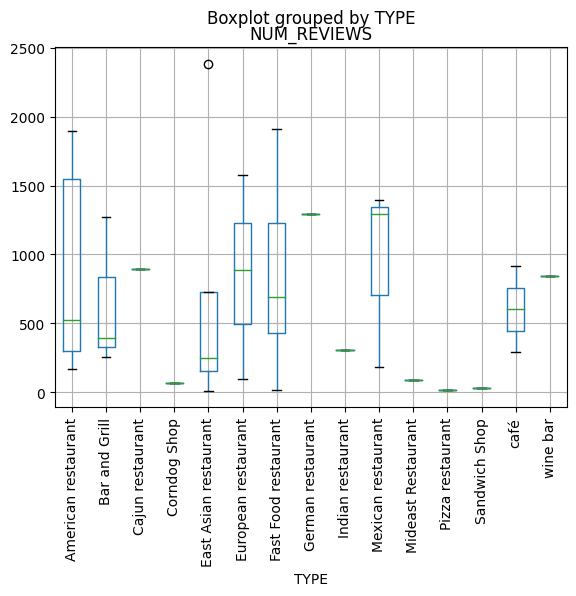

In [58]:
#Nistler
#See spread of NUMREVIEWS based on restaurant type
restaurants.boxplot(column='NUM_REVIEWS',by='TYPE',rot=90)

<AxesSubplot: title={'center': 'RATINGS_OUTOF5'}, xlabel='TYPE'>

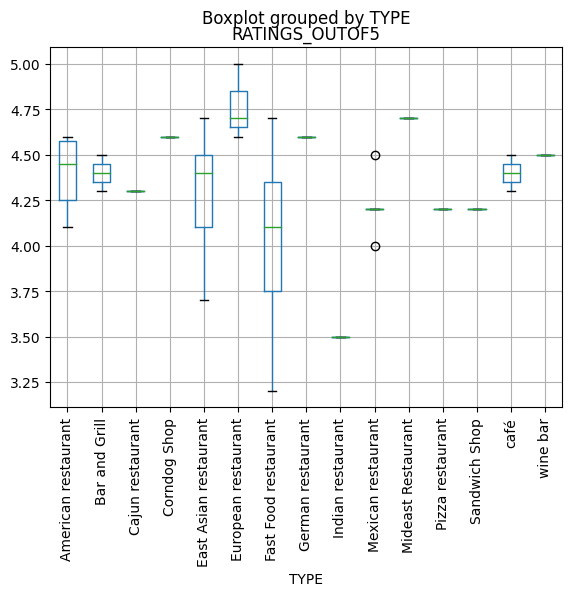

In [59]:
#Nistler
#See spread of NUMREVIEWS based on restaurant type
restaurants.boxplot(column='RATINGS_OUTOF5',by='TYPE',rot=90)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'DISTANCE FROM WSU'),
  Text(0, 1.5, 'RATINGS_OUTOF5'),
  Text(0, 2.5, 'NUM_REVIEWS'),
  Text(0, 3.5, 'MIN_COST'),
  Text(0, 4.5, 'MAX_COST'),
  Text(0, 5.5, 'ON_CAMPUS'),
  Text(0, 6.5, 'Hours_Monday'),
  Text(0, 7.5, 'Hours_Tuesday'),
  Text(0, 8.5, 'Hours_Wednesday'),
  Text(0, 9.5, 'Hours_Thursday'),
  Text(0, 10.5, 'Hours_Friday'),
  Text(0, 11.5, 'Hours_Saturday'),
  Text(0, 12.5, 'Hours_Sunday'),
  Text(0, 13.5, 'TotalHours')])

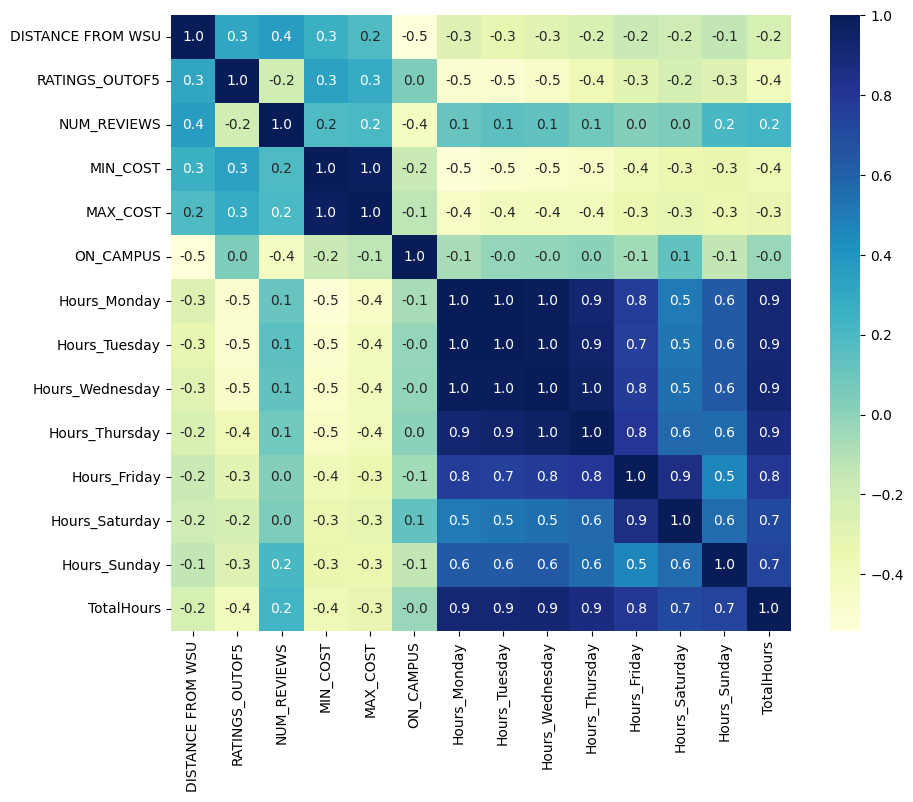

In [60]:
# Marshall
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(restaurants.corr(numeric_only=True), annot=True, fmt=".1f", cmap="YlGnBu")

# Increase the font size of the numbers on the heatmap
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

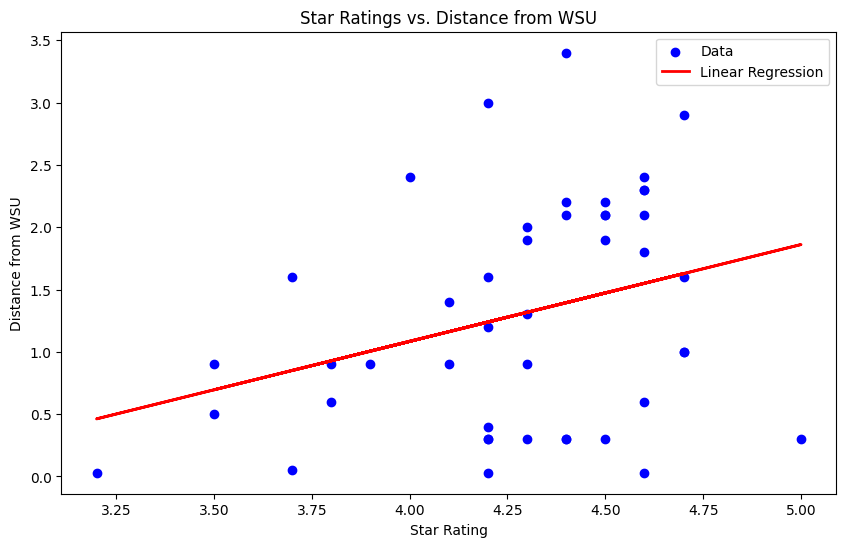

In [61]:
#Nistler
#See OLS of NUMREVIEWS based on Distance from WSU
X = restaurants[['RATINGS_OUTOF5']]
y = restaurants['DISTANCE FROM WSU']

# Fit linear regression model
regression = LinearRegression()
regression.fit(X, y)

# Predictions using the fitted model
y_pred = regression.predict(X)

# Plot scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')

# Add labels and title
plt.xlabel('Star Rating')
plt.ylabel('Distance from WSU')
plt.title('Star Ratings vs. Distance from WSU')

# Add legend
plt.legend()

plt.show()

In [62]:
#Marshall
#Get coefficient value and p-value for both variables
# Assuming 'data' is your DataFrame containing the features (X) and target variable (y)

# Add a constant column to the features
X = sm.add_constant(restaurants[['RATINGS_OUTOF5']])

# Fit the linear regression model
model = sm.OLS(restaurants['DISTANCE FROM WSU'], X)
results = model.fit()

# Get the coefficient values and p-values
coefficients = results.params
p_values = results.pvalues

# Display the variable, coefficient value, and p-value
for variable, coefficient, p_value in zip(X.columns, coefficients, p_values):
    print(f"Variable: {variable}\nCoefficient value: {coefficient}\np-value: {p_value}\n")

Variable: const
Coefficient value: -2.0250869850050894
p-value: 0.19304447310387235

Variable: RATINGS_OUTOF5
Coefficient value: 0.7772128402969847
p-value: 0.03467795029231652



In [63]:
#Marshall
# Extract features (X) and target variable (y)
X = restaurants[['RATINGS_OUTOF5']]
y = restaurants['DISTANCE FROM WSU']

# Add constant to X
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get coefficient values
coefficients = model.params

# Extract coefficient for the intercept and the feature
intercept = round(coefficients['const'], 4)
feature_coefficient = round(coefficients['RATINGS_OUTOF5'], 4)

# Print equation of the linear regression model
print(f"Equation of the linear regression model:")
print(f"Distance from WSU = {intercept} + {feature_coefficient} * Rating Score")

Equation of the linear regression model:
Distance from WSU = -2.0251 + 0.7772 * Rating Score


In [64]:
# Add a constant column to the features
X = sm.add_constant(restaurants[['RATINGS_OUTOF5']])

# Fit the linear regression model
model = sm.OLS(restaurants['DISTANCE FROM WSU'], X)
results = model.fit()

# Get the coefficient values and p-values
coefficients = results.params
p_values = results.pvalues

# Display the variable, coefficient value, and p-value
results.summary(xname=['intercept','RATINGS_OUTOF5'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      DISTANCE FROM WSU   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     4.758
Date:                Tue, 07 May 2024   Prob (F-statistic):             0.0347
Time:                        16:52:24   Log-Likelihood:                -57.099
No. Observations:                  45   AIC:                             118.2
Df Residuals:                      43   BIC:                             121.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -2.0251      1.531     -1.322      0.193      -5.114       1.063
RATINGS_OUTOF5     0.7772      0.356      2.181      0.035       0.059       1.496
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   0.905
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                0.962
Skew:                           0.127   Prob(JB):                        0.618
Kurtosis:                       2.330   Cond. No.                         52.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## The effect of the distance from Wichita State University on the reviews 
### Finding correlation

count      45.000000
mean      737.977778
std       629.343037
min         9.000000
25%       208.000000
50%       661.000000
75%      1274.000000
max      2383.000000
Name: NUM_REVIEWS, dtype: float64

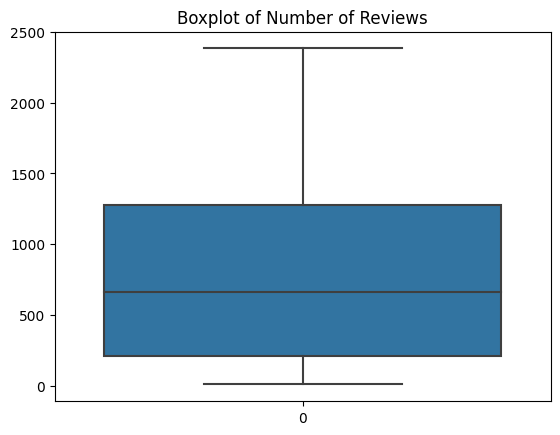

In [65]:
#Nistler
# Response Variable
sns.boxplot(restaurants['NUM_REVIEWS']).set_title('Boxplot of Number of Reviews')
restaurants['NUM_REVIEWS'].describe()

count    45.000000
mean      1.303111
std       0.917268
min       0.030000
25%       0.400000
50%       1.200000
75%       2.100000
max       3.400000
Name: DISTANCE FROM WSU, dtype: float64

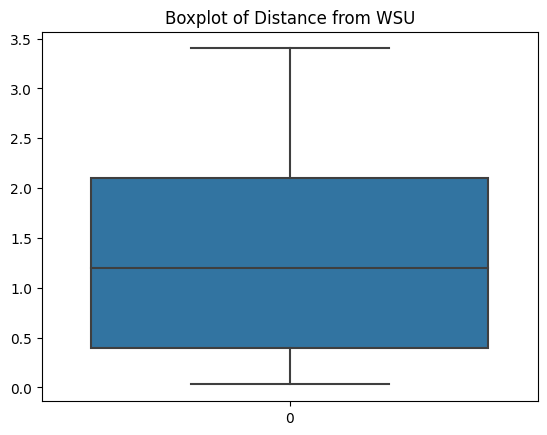

In [66]:
#Nistler
sns.boxplot(restaurants['DISTANCE FROM WSU']).set_title('Boxplot of Distance from WSU')
restaurants['DISTANCE FROM WSU'].describe()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'DISTANCE FROM WSU'),
  Text(0, 1.5, 'RATINGS_OUTOF5'),
  Text(0, 2.5, 'NUM_REVIEWS'),
  Text(0, 3.5, 'MIN_COST'),
  Text(0, 4.5, 'MAX_COST'),
  Text(0, 5.5, 'ON_CAMPUS'),
  Text(0, 6.5, 'Hours_Monday'),
  Text(0, 7.5, 'Hours_Tuesday'),
  Text(0, 8.5, 'Hours_Wednesday'),
  Text(0, 9.5, 'Hours_Thursday'),
  Text(0, 10.5, 'Hours_Friday'),
  Text(0, 11.5, 'Hours_Saturday'),
  Text(0, 12.5, 'Hours_Sunday'),
  Text(0, 13.5, 'TotalHours')])

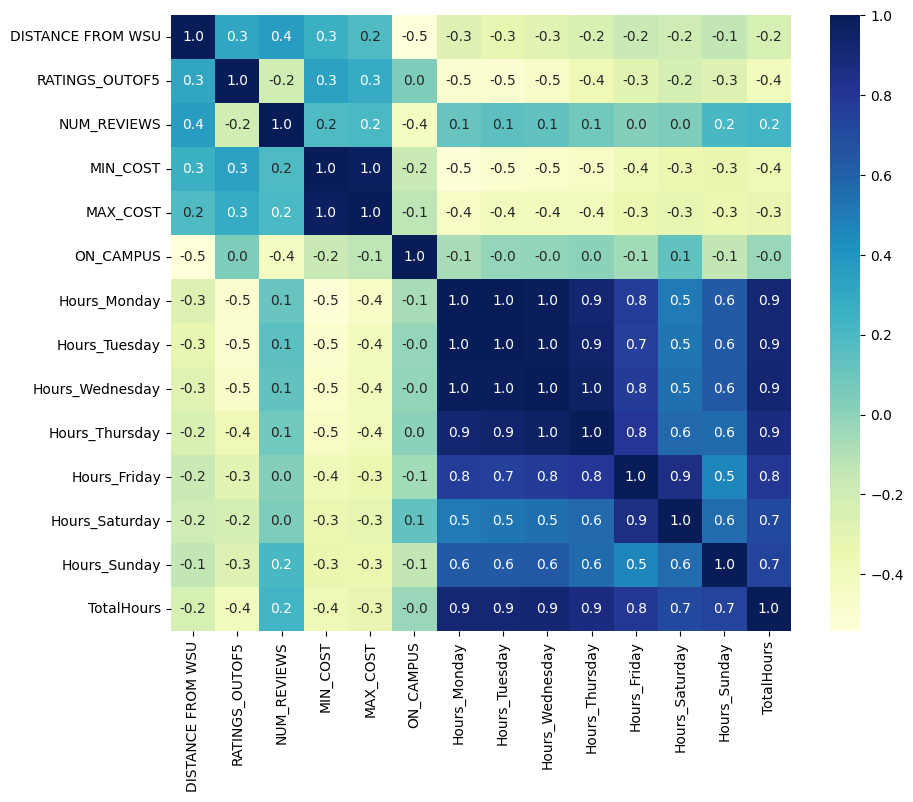

In [67]:
# Marshall
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(restaurants.corr(numeric_only=True), annot=True, fmt=".1f", cmap="YlGnBu")

# Increase the font size of the numbers on the heatmap
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

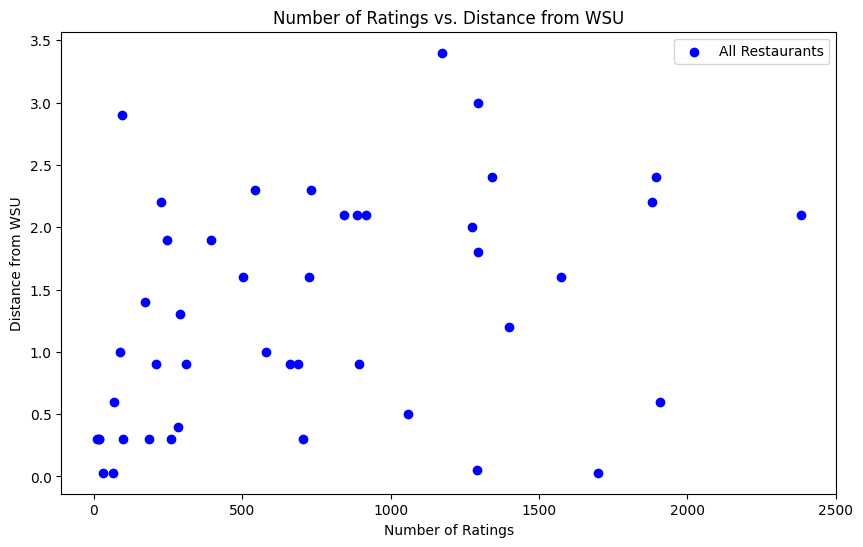

In [68]:
#Marshall
plt.figure(figsize=(10, 6))

# Plot all data
plt.scatter(restaurants['NUM_REVIEWS'], restaurants['DISTANCE FROM WSU'], color='blue', label='All Restaurants')

# Add labels and title
plt.xlabel('Number of Ratings')
plt.ylabel('Distance from WSU')
plt.title('Number of Ratings vs. Distance from WSU')
plt.legend()

plt.show()

In [69]:
#Marshall
#Get coefficient value and p-value for both variables
# Assuming 'data' is your DataFrame containing the features (X) and target variable (y)

# Add a constant column to the features
X = sm.add_constant(restaurants[['NUM_REVIEWS']])

# Fit the linear regression model
model = sm.OLS(restaurants['DISTANCE FROM WSU'], X)
results = model.fit()

# Get the coefficient values and p-values
coefficients = results.params
p_values = results.pvalues

# Display the variable, coefficient value, and p-value
for variable, coefficient, p_value in zip(X.columns, coefficients, p_values):
    print(f"Variable: {variable}\nCoefficient value: {coefficient}\np-value: {p_value}\n")

Variable: const
Coefficient value: 0.9163839971337573
p-value: 3.991716135967749e-05

Variable: NUM_REVIEWS
Coefficient value: 0.0005240362591159303
p-value: 0.01527647143850817



In [70]:
#Marshall
# Extract features (X) and target variable (y)
X = restaurants[['NUM_REVIEWS']]
y = restaurants['DISTANCE FROM WSU']

# Add constant to X
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get coefficient values
coefficients = model.params

# Extract coefficient for the intercept and the feature
intercept = round(coefficients['const'], 4)
feature_coefficient = round(coefficients['NUM_REVIEWS'], 4)

# Print equation of the linear regression model
print(f"Equation of the linear regression model:")
print(f"Distance from WSU = {intercept} + {feature_coefficient} * Rating Score")

Equation of the linear regression model:
Distance from WSU = 0.9164 + 0.0005 * Rating Score


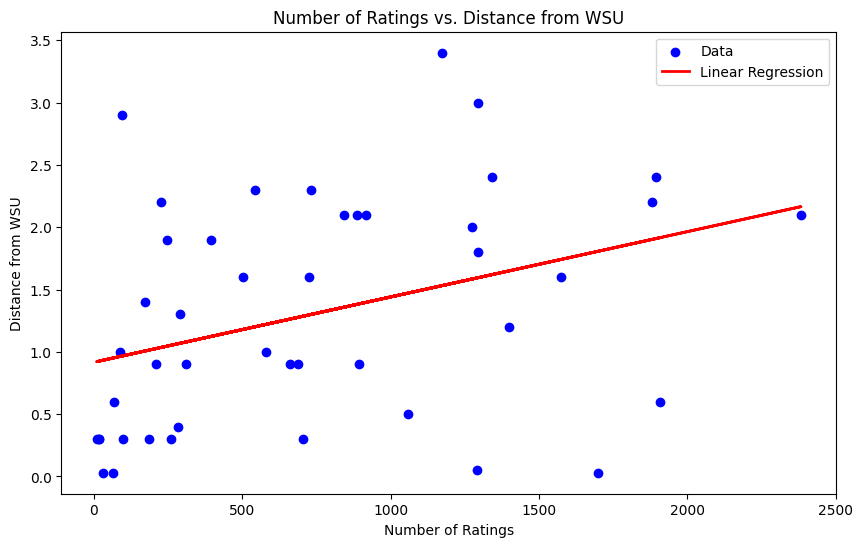

In [71]:
#Marshall
#Make machine learning model to get line on graph
# Extract features (X) and target variable (y)
X = restaurants[['NUM_REVIEWS']]
y = restaurants['DISTANCE FROM WSU']

# Fit linear regression model
regression = LinearRegression()
regression.fit(X, y)

# Predictions using the fitted model
y_pred = regression.predict(X)

# Plot scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')

# Add labels and title
plt.xlabel('Number of Ratings')
plt.ylabel('Distance from WSU')
plt.title('Number of Ratings vs. Distance from WSU')

# Add legend
plt.legend()

plt.show()

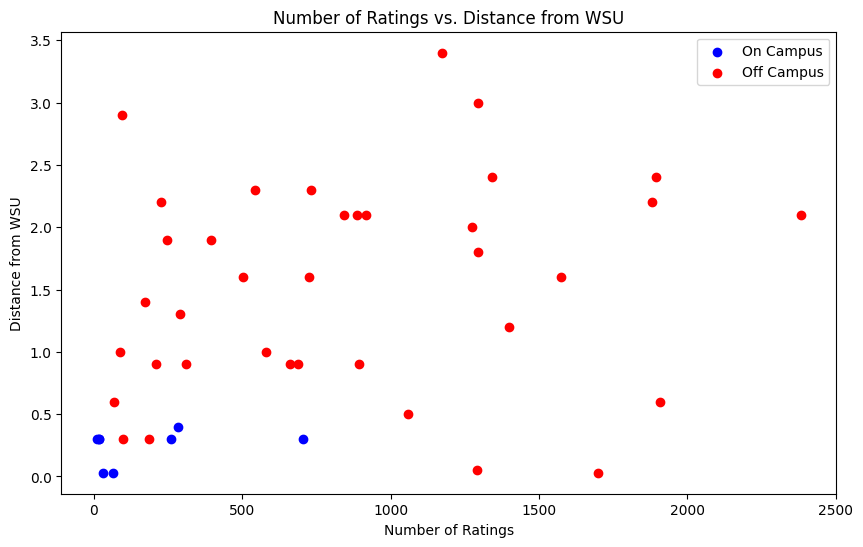

In [72]:
#Marshall
# Make grph split by on and off campus
on_campus = restaurants[restaurants['ON_CAMPUS'] == True]
off_campus = restaurants[restaurants['ON_CAMPUS'] == False]
plt.figure(figsize=(10, 6))

# Plot on-campus data
plt.scatter(on_campus['NUM_REVIEWS'], on_campus['DISTANCE FROM WSU'], color='blue', label='On Campus')

# Plot off-campus data
plt.scatter(off_campus['NUM_REVIEWS'], off_campus['DISTANCE FROM WSU'], color='red', label='Off Campus')

# Add labels and title
plt.xlabel('Number of Ratings')
plt.ylabel('Distance from WSU')
plt.title('Number of Ratings vs. Distance from WSU')
plt.legend()

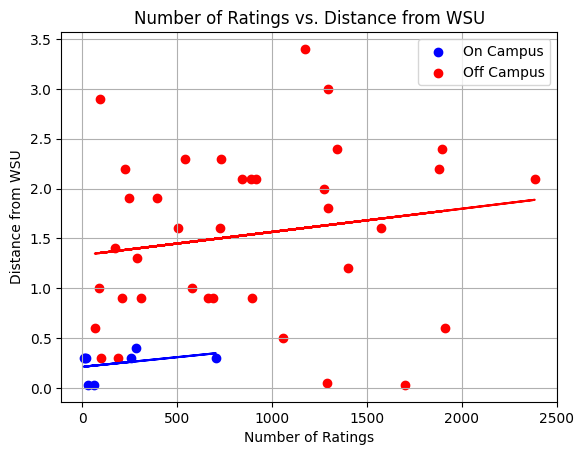

In [73]:
# Calculate linear regression for on-campus data
slope, intercept, _, _, _ = linregress(on_campus['NUM_REVIEWS'], on_campus['DISTANCE FROM WSU'])

# Plot the regression line for on-campus data
plt.plot(on_campus['NUM_REVIEWS'], slope * on_campus['NUM_REVIEWS'] + intercept, color='blue')

# Calculate linear regression for off-campus data
slope, intercept, _, _, _ = linregress(off_campus['NUM_REVIEWS'], off_campus['DISTANCE FROM WSU'])

# Plot the regression line for off-campus data
plt.plot(off_campus['NUM_REVIEWS'], slope * off_campus['NUM_REVIEWS'] + intercept, color='red')

# Plot on-campus data
plt.scatter(on_campus['NUM_REVIEWS'], on_campus['DISTANCE FROM WSU'], color='blue', label='On Campus')

# Plot off-campus data
plt.scatter(off_campus['NUM_REVIEWS'], off_campus['DISTANCE FROM WSU'], color='red', label='Off Campus')
# Add labels and title
plt.xlabel('Number of Ratings')
plt.ylabel('Distance from WSU')
plt.title('Number of Ratings vs. Distance from WSU')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Milestone 2
## Adding latitude and longitude
### Geocoding, add lat and long

In [74]:
#Nistler
#Setup for geopy to geocode the address columns
# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter

#Clean out all suite numbers

geolocator = Nominatim(user_agent="httpabc")
#location = geolocator.geocode("175 5th Avenue NYC")
#location = geolocator.geocode(restaurants['ADDRESS'].iloc[0])
location = geolocator.geocode('1711 North Vassar Wichita, KS 67202')

print(location.address)
print((location.latitude, location.longitude))

1711, North Vassar, Fairmount, Wichita, Sedgwick County, Kansas, 67208, United States
(37.714492816326526, -97.295438)


### Clean addresses before geocoding

In [75]:
# import re
restaurants_pd = restaurants.copy()

#Remove odd numbers before address
restaurants_pd['ADDRESS']=restaurants_pd['ADDRESS'].str.replace('106, 1861, ', '', regex=False)
#Remove suite numbers
regex_pat = re.compile("(#)(\d\d|\d\d\d|\d\d\d\d)", flags=re.IGNORECASE)
restaurants_pd['ADDRESS']=restaurants_pd['ADDRESS'].replace(regex_pat, '', regex=True)
regex_pat = re.compile("(\d,|\d\d,|\d\d\d,|\d\d\d\d,)", flags=re.IGNORECASE)
restaurants_pd['ADDRESS']=restaurants_pd['ADDRESS'].replace(regex_pat, ',', regex=True)
regex_pat = re.compile("((S|s)uite|Ste)", flags=re.IGNORECASE)
restaurants_pd['ADDRESS']=restaurants_pd['ADDRESS'].replace(regex_pat, '', regex=True)

#Remove building names and random space
restaurants_pd['ADDRESS']=restaurants_pd['ADDRESS'].replace('Rhatigan Student Center, ', '', regex=True)
restaurants_pd['ADDRESS']=restaurants_pd['ADDRESS'].replace('  ,', ',', regex=True)
restaurants_pd['ADDRESS']=restaurants_pd['ADDRESS'].replace(' ,', ',', regex=True)

restaurants_pd['ADDRESS']

0             4510 E 19th St N, Wichita, KS 67208
1             2939 E 21st St N, Wichita, KS 67214
2             4510 E 19th St N, Wichita, KS 67208
3             4521 E 21st St N, Wichita, KS 67208
4         2424 N Woodlawn Blvd, Wichita, KS 67220
5            1845 Fairmount St, Wichita, KS 67260
6           2721 E Central Ave, Wichita, KS 67214
7               2929 N Rock Rd, Wichita, KS 67226
8           4618 E Central Ave, Wichita, KS 67208
9             6120 E 21st St N, Wichita, KS 67208
10          1350 N Hillside St, Wichita, KS 67214
11          3700 E Douglas Ave, Wichita, KS 67208
13          1811 N Hillside St, Wichita, KS 67214
14            2419 E 13th St N, Wichita, KS 67214
15           410 N Hillside St, Wichita, KS 67214
16          4714 E Douglas Ave, Wichita, KS 67208
17          5400 E Central Ave, Wichita, KS 67208
18            4510 E 19th St N, Wichita, KS 67208
19           1845 Fairmount St, Wichita, KS 67260
20          2545 N Hillside St, Wichita, KS 67219


### Geocode

In [76]:
# from tqdm.notebook import tqdm


tqdm.pandas()

locator = Nominatim(user_agent='spatialthoughts', timeout=10)
#Nomatim is rate limited to 1 req per second
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

#restaurants_pd = restaurants.copy()

#UNCOMMENT LINE BELOW TO REQUEST LAT AND LONG UPDATES, Don't run this too many times, can get blacklisted with too many repeat attempts. Supposed to cache the result
#restaurants_pd['location'] = restaurants_pd['ADDRESS'].progress_apply(geocode)
#restaurants_pd['LATITUDE'] = restaurants_pd['location'].apply(lambda loc: loc.latitude if loc else None)
#restaurants_pd['LONGITUDE'] = restaurants_pd['location'].apply(lambda loc: loc.longitude if loc else None)

#restaurants_pd.to_csv('restaurants_with_geolocation.csv')

#Otherwise just read file that I saved
restaurants_geolocation = pd.read_csv('restaurants_with_geolocation.csv')

restaurants_geolocation

,Unnamed: 0,RESTAURANT NAME,DISTANCE FROM WSU,ADDRESS,MONDAY,TUESDAY,WEDNESDAY,THURSDAY,FRIDAY,SATURDAY,...,Hours_Tuesday,Hours_Wednesday,Hours_Thursday,Hours_Friday,Hours_Saturday,Hours_Sunday,TotalHours,location,LATITUDE,LONGITUDE
0,0,Social Tap Drinkery,0.30,"4510 E 19th St N, Wichita, KS 67208",11AM-11PM,11AM-11PM,11AM-11PM,11AM-11PM,11AM-11PM,11AM-11PM,...,12.00,12.00,12.00,12.00,12.00,9.00,81.00,"East 19th Street North, College Terrace, Wichi...",37.718593,-97.303609
1,1,sonic drive in,0.05,"2939 E 21st St N, Wichita, KS 67214",6AM-11PM,6AM-11PM,6AM-11PM,6AM-11PM,6AM-11PM,7AM-11PM,...,17.00,17.00,17.00,17.00,16.00,16.00,117.00,"2939, East 21st Street North, Wichita, Sedgwic...",37.722663,-97.302018
2,2,Sungrano,0.30,"4510 E 19th St N, Wichita, KS 67208",11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,...,11.00,11.00,11.00,11.00,11.00,9.00,75.00,"East 19th Street North, College Terrace, Wichi...",37.718593,-97.303609
3,3,Fuzz's taco shop,0.30,"4521 E 21st St N, Wichita, KS 67208",10:30AM-10:30PM,10:30AM-10:30PM,10:30AM-10:30PM,10:30AM-11PM,10:30AM-11PM,10:30AM-11PM,...,12.00,12.00,12.50,12.50,12.50,9.00,82.50,"4521, East 21st Street North, Wichita, Sedgwic...",37.722825,-97.283857
4,4,Magnolia café wichita,1.30,"2424 N Woodlawn Blvd, Wichita, KS 67220",0,11AM-9PM,11AM-9PM,11AM-9PM,11AM-9PM,"9AM-2PM,5-9PM",...,10.00,10.00,10.00,10.00,5.00,5.00,50.00,"2424, North Woodlawn Boulevard, Wichita, Sedgw...",37.726386,-97.262204
5,5,chick-fil-A,0.40,"1845 Fairmount St, Wichita, KS 67260",6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,...,15.50,15.50,15.50,15.50,15.50,NaN,93.00,"Wichita State University, 1845, Fairmount Stre...",37.719343,-97.289888
6,6,prost,1.80,"2721 E Central Ave, Wichita, KS 67214",0,11AM-9PM,11AM-9PM,11AM-9PM,11AM-9PM,11AM-9PM,...,10.00,10.00,10.00,10.00,10.00,NaN,50.00,"2721, East Central Avenue, Wichita, Sedgwick C...",37.693586,-97.304489
7,7,Five guys,3.40,"2929 N Rock Rd, Wichita, KS 67226",11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,...,11.00,11.00,11.00,11.00,11.00,11.00,77.00,"2929, North Rock Road, Wichita, Sedgwick Count...",37.735853,-97.244754
8,8,Georges french bistro,1.60,"4618 E Central Ave, Wichita, KS 67208",4PM-10PM,4PM-10PM,4PM-10PM,4PM-10PM,4PM-10PM,4PM-11PM,...,6.00,6.00,6.00,6.00,7.00,NaN,37.00,"4618, East Central Avenue, Forest Hills, Wichi...",37.693866,-97.282464
9,9,spangles,0.90,"6120 E 21st St N, Wichita, KS 67208",6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,...,15.50,15.50,15.50,15.50,15.50,15.00,108.00,"Spangles, 6120, East 21st Street North, Minneh...",37.723439,-97.264962


In [77]:
apartments = pd.read_excel('Apartments spread sheet PDS task.xlsx', sheet_name = 'Sheet1')
apartments.dropna(subset='Address', inplace=True)
#These alreadu have coordinates in dataset, just need to convert some to decimal representation

### Cleaning From 1st Milestone

In [78]:
#Cleaning from Milestone 1
restaurants = pd.read_excel('restaurants.xlsx', sheet_name = 'RESTAURANTS NEAR WSU')
houses = pd.read_excel('Independent Houses.xlsx', sheet_name = 'independent houses near wsu')
restaurants.info()
restaurants.shape
#remove = El papa pollo restaurant(closed perminantly), Albero café	(temp_closed), Dragon express	(temporialy closed), Clouds bar & lounge	(perminaly closed), Pam's wings with things (perminaly closed), Himali Eats	(perminaly closed),
remove_restraunts =["El papa pollo restaurant", "Albero café", "Dragon express", "Clouds bar & lounge", "Pam's wings with things", "Himali Eats"]
restaurants = restaurants[~restaurants['RESTAURANT NAME'].isin(remove_restraunts)]
#remove rating column and will add new column in next step
restaurants = restaurants.drop("Ratings", axis =1)
#Add New columns to the data for the analysis
restaurants['RATINGS_OUTOF5'] = [4.4,3.7,4.2,4.2, 4.3, 4.2, 4.6, 4.4, 4.7, 4.1, 3.8, 4.6, 4.3, 3.2, 4.7, 4.2, 4.5, 4.5, 5.0, 4.4, 4.6, 4.5, 4.3, 4.5, 4.3, 4.1, 4.7, 3.5, 3.6, 3.5, 3.4, 4.1, 4.5, 4.7, 3.9, 4.2, 3.0, 4.0, 3.8, 4.3, 4.6, 4.6, 4.4, 4.5, 4.2, 4.4, 4.5, 4.0, 4.6, 3.7, 4.3]
restaurants['NUM_REVIEWS'] = [260,1291, 18, 704, 291, 285, 1293, 1172, 1575, 661, 1909, 1895, 702, 1700, 580, 504, 843, 394, 97, 9, 67, 14, 17, 187, 893, 30, 88, 309, 16, 1057, 428, 172, 1087, 95, 208, 1398, 737, 225, 689, 1274, 544, 888, 228, 916, 1293, 2383, 1881, 1342, 731, 726, 247]
restaurants['MIN_COST'] = [10, 1,  np.nan, 10 ,10, 1, 10, 10, 50, 1, 10, 10, 10, 1, 10, 10, 20, 10, 10, 10, 10, np.nan, 1, 10, 10, np.nan, 10, 10, np.nan, 10, 1, 10, 10, 10, 10, 1, 1, 10, np.nan, 10, 10, np.nan, np.nan, 10, 10, 10, 20, 10, 10, 10, 10]
restaurants['MAX_COST'] = [20, 10, np.nan, 20, 20, 10, 20, 20, 100, 10, 20, 20, 20, 10, 20, 20, 30, 20, 20, 20, 20, np.nan, 10, 20, 20, np.nan, 20, 20, np.nan, 20, 10, 20, 20, 20, 20, 10, 10, 20, np.nan, 20, 20, np.nan, np.nan, 20, 20, 20, 30, 20, 20, 20, 20]
restaurants['ON_CAMPUS'] = [True, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
# Add new data
#"RESTAURANT NAME" : , "DISTANCE FROM WSU":  ,	"ADDRESS" : ,	"MONDAY" : ,	"TUESDAY": ,	"WEDNESDAY" : ,	"THURSDAY" : ,	"FRIDAY" : ,	"SATURDAY" : ,	"SUNDAY" : ,	"TYPE" :  ,	"RATINGS_OUTOF5" : ,	"NUM_REVIEWS" : ,	"MIN_COST" : ,	"MAX_COST" : ,	"ON_CAMPUS" :
new_data = [ {"RESTAURANT NAME" : "Jersey Mike's Subs", "DISTANCE FROM WSU":  0.03,	"ADDRESS" : "4521 E 21st St N Suite 101, Wichita, KS 67208",	"MONDAY" : "10AM-9PM",	"TUESDAY": "10AM-9PM",	"WEDNESDAY" : "10AM-9PM",	"THURSDAY" : "10AM-9PM",	"FRIDAY" : "10AM-9PM",	"SATURDAY" : "10AM-9PM",	"SUNDAY" : "10AM-9PM",	"TYPE" : "Sandwich Shop" ,	"RATINGS_OUTOF5" : 4.2,	"NUM_REVIEWS" : 30,	"MIN_COST" : 10,	"MAX_COST" : 20,	"ON_CAMPUS" : True },
            {"RESTAURANT NAME" : "Two Hands Corn Dogs", "DISTANCE FROM WSU":  .03,	"ADDRESS" : "4510 E 19th St N Suite 106, Wichita, KS 67208",	"MONDAY" : "11AM-9PM",	"TUESDAY": "11AM-9PM",	"WEDNESDAY" : "11AM-9PM",	"THURSDAY" : "11AM-9PM",	"FRIDAY" : "11AM-9PM",	"SATURDAY" : "11AM-9PM",	"SUNDAY" : "11AM-9PM",	"TYPE" :  "Corndog Shop",	"RATINGS_OUTOF5" : 4.6,	"NUM_REVIEWS" : 65,	"MIN_COST" : 10,	"MAX_COST" : 20,	"ON_CAMPUS" : True}
             ]
restaurants = restaurants._append(new_data, ignore_index =True)
# Get the spans of time
restaurants_array = restaurants[['MONDAY', 'TUESDAY',	'WEDNESDAY',	'THURSDAY',	'FRIDAY',	'SATURDAY',	'SUNDAY']].T.values
restaurants_array = restaurants_array.flatten()
list_of_unique = pd.unique(restaurants_array)
list_of_unique = [str(s).replace('\u202f', '') if isinstance(s, str) else s for s in list_of_unique]
spans = {'11AM-11PM': 12.0, '6AM-11PM': 17.0, '11AM-10PM': 11.0, '10:30AM-10:30PM': 12.0, '6:30AM-10PM': 15.50, '4PM-10PM': 6.0, '10:30AM-10PM': 11.5, '4AM-11PM': 19.0, '8AM-2AM': 18.0, '10:30AM-9PM': 10.5, '11AM-8PM': 9.0,
         '11AM-3PM': 4.0, '10AM-7PM': 9.0, '11AM–2:30PM': 3.50, '11AM-9PM': 10.0, '7AM-9PM': 14.0, '7AM-12PM': 5.0, '10AM-10PM': 12.0, '9AM-10PM': 13.0, '3PM-9PM': 6.0, '10:45AM-10:30PM': 11.75, '5PM-10PM': 5.0, '10AM-9PM': 11.0,
         '11AM–2:30PM, 5–9PM': 4.0, '5AM-11PM': 18.0, '4PM-8PM': 4.0, '3PM-10PM': 7.0, '11AM–3PM, 4–8PM': 4.0, '6AM-10PM': 16.0, '9AM-7PM': 10.0, '10:30AM-9:30PM': 11, '10:30AM-11PM': 12.5, '12AM-11:59PM': 11.99, '11AM-12AM': 13.0,
         '11AM–2:30PM, 5–10PM': 5.0, '10AM-5PM': 7.0, '11AM-10:30PM': 11.50, '11AM-1PM': 2.0, '3PM-11PM': 8.0, '5PM-11PM': 6.0, '7AM-11PM': 16.0, '9AM-2PM,5-9PM': 5.0, '4PM-11PM': 7.0, '10AM-11PM': 13.0, '9AM-9PM': 12.0,
         '9AM-2PM': 5.0, '7AM-10PM': 15.0, '10AM-3PM': 5.0, '12PM-5PM': 5.0, '9AM-8PM': 11.0, '12PM-10PM': 10.0, np.nan: 0.0, '0': 0.0, 'Null' : 0.0}

#['MONDAY', 'TUESDAY',	'WEDNESDAY',	'THURSDAY',	'FRIDAY',	'SATURDAY',	'SUNDAY']
restaurants['Hours_Monday'] = restaurants['MONDAY'].map(spans)
restaurants['Hours_Tuesday'] = restaurants['TUESDAY'].map(spans)
restaurants['Hours_Wednesday'] = restaurants['WEDNESDAY'].map(spans)
restaurants['Hours_Thursday'] = restaurants['THURSDAY'].map(spans)
restaurants['Hours_Friday'] = restaurants['FRIDAY'].map(spans)
restaurants['Hours_Saturday'] = restaurants['SATURDAY'].map(spans)
restaurants['Hours_Sunday'] = restaurants['SUNDAY'].map(spans)
specific_columns = ['Hours_Monday', 'Hours_Tuesday', 'Hours_Wednesday', 'Hours_Thursday', 'Hours_Friday', 'Hours_Saturday', 'Hours_Sunday']
restaurants['TotalHours'] = restaurants[specific_columns].sum(axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RESTAURANT NAME    57 non-null     object 
 1   DISTANCE FROM WSU  57 non-null     float64
 2   ADDRESS            57 non-null     object 
 3   MONDAY             56 non-null     object 
 4   TUESDAY            56 non-null     object 
 5   WEDNESDAY          56 non-null     object 
 6   THURSDAY           56 non-null     object 
 7   FRIDAY             56 non-null     object 
 8   SATURDAY           56 non-null     object 
 9   SUNDAY             56 non-null     object 
 10  TYPE               57 non-null     object 
 11  Ratings            0 non-null      float64
dtypes: float64(2), object(10)
memory usage: 5.5+ KB


In [79]:
apartments['Address']

apartments_pd = apartments.copy()

#Drop old lat and long fields
apartments_pd.drop(columns=['Latitude'], inplace=True)
apartments_pd.drop(columns=['Longitude'], inplace=True)

#Remove odd numbers before address
apartments_pd['Address']=apartments_pd['Address'].str.replace('106, 1861, ', '', regex=False)
#Remove suite numbers
regex_pat = re.compile("(#)(\d\d|\d\d\d|\d\d\d\d)", flags=re.IGNORECASE)
apartments_pd['Address']=apartments_pd['Address'].replace(regex_pat, '', regex=True)
regex_pat = re.compile("(\d,|\d\d,|\d\d\d,|\d\d\d\d,)", flags=re.IGNORECASE)
apartments_pd['Address']=apartments_pd['Address'].replace(regex_pat, ',', regex=True)
regex_pat = re.compile("((S|s)uite|Ste)", flags=re.IGNORECASE)
apartments_pd['Address']=apartments_pd['Address'].replace(regex_pat, '', regex=True)


#Brute force cleaning, not smart enough to do this efficiently
#Remove building names and random space
apartments_pd['Address']=apartments_pd['Address'].replace('  ,', ',', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace(' ,', ',', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace(',(w|W)', ', W', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace(',(ks|KS)', ', KS', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace('KS,', 'KS ', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace('\n', '', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace(' 6, United States', '', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace('KS  ', 'KS ', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace('AVE,', 'Ave', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace('Woodlawn, Blvd,', 'Woodlawn Blvd,', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace('Carter, Wichita', 'Carter St Wichita', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace('Ave, Wichita', 'Ave Wichita', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace('St # A, Wichita', 'St Wichita', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace('331N Rock is ave,', '331 N Rock Island', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace('612E', '612 E', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace('3032 N Arkansas', '3032 Arkansas', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace('2011 N Innovation Blvd', '2011 Innovation Blvd', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace('Doglas', 'Douglas', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace('N Vassar (Avenue|Ave)', 'North Vassar', regex=True)

#apartments_pd['Address']

In [80]:
#UNCOMMENT LINE BELOW TO REQUEST LAT AND LONG UPDATES, Don't run this too many times, can get blacklisted with too many repeat attempts. Supposed to cache the result
# apartments_pd['location'] = apartments_pd['Address'].progress_apply(geocode)
#apartments_pd['LATITUDE'] = apartments_pd['location'].apply(lambda loc: loc.latitude if loc else None)
#apartments_pd['LONGITUDE'] = apartments_pd['location'].apply(lambda loc: loc.longitude if loc else None)

#apartments_pd

#apartments_pd.to_csv('apartments_with_geolocation.csv')

#Otherwise just read file that I saved
apartments_geolocation = pd.read_csv('restaurants_with_geolocation.csv')

apartments_geolocation.head(5)

,Unnamed: 0,RESTAURANT NAME,DISTANCE FROM WSU,ADDRESS,MONDAY,TUESDAY,WEDNESDAY,THURSDAY,FRIDAY,SATURDAY,...,Hours_Tuesday,Hours_Wednesday,Hours_Thursday,Hours_Friday,Hours_Saturday,Hours_Sunday,TotalHours,location,LATITUDE,LONGITUDE
0,0,Social Tap Drinkery,0.30,"4510 E 19th St N, Wichita, KS 67208",11AM-11PM,11AM-11PM,11AM-11PM,11AM-11PM,11AM-11PM,11AM-11PM,...,12.0,12.0,12.0,12.0,12.0,9.0,81.0,"East 19th Street North, College Terrace, Wichi...",37.718593,-97.303609
1,1,sonic drive in,0.05,"2939 E 21st St N, Wichita, KS 67214",6AM-11PM,6AM-11PM,6AM-11PM,6AM-11PM,6AM-11PM,7AM-11PM,...,17.0,17.0,17.0,17.0,16.0,16.0,117.0,"2939, East 21st Street North, Wichita, Sedgwic...",37.722663,-97.302018
2,2,Sungrano,0.30,"4510 E 19th St N, Wichita, KS 67208",11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,...,11.0,11.0,11.0,11.0,11.0,9.0,75.0,"East 19th Street North, College Terrace, Wichi...",37.718593,-97.303609
3,3,Fuzz's taco shop,0.30,"4521 E 21st St N, Wichita, KS 67208",10:30AM-10:30PM,10:30AM-10:30PM,10:30AM-10:30PM,10:30AM-11PM,10:30AM-11PM,10:30AM-11PM,...,12.0,12.0,12.5,12.5,12.5,9.0,82.5,"4521, East 21st Street North, Wichita, Sedgwic...",37.722825,-97.283857
4,4,Magnolia café wichita,1.30,"2424 N Woodlawn Blvd, Wichita, KS 67220",0,11AM-9PM,11AM-9PM,11AM-9PM,11AM-9PM,"9AM-2PM,5-9PM",...,10.0,10.0,10.0,10.0,5.0,5.0,50.0,"2424, North Woodlawn Boulevard, Wichita, Sedgw...",37.726386,-97.262204


## Clustering / Data Visualization

In [5]:
import plotly.express as px
import pandas as pd

# Read the dataset
restaurants_df = pd.read_csv("restaurants_with_geolocation.csv")
apartments_df = pd.read_csv("apartments_with_geolocation.csv")

# Define a dictionary to map restaurant types to colors
restaurant_color_map = {
    'Bar and restaurant': 'orange',
    'Fast Food restaurant': 'blue',
    'Pizza restaurant': 'green',
    'Tex-Mex resaurant': 'red',
    'café': 'purple',
    'German restaurant': 'yellow',
    'french restaurant': 'cyan',
    'Chicken restaurant': 'magenta',
    'Hamburger restaurant': 'lime',
    'Indian restaurant': 'pink',
    'Restaurant': 'brown',
    'American restaurant': 'teal',
    'wine bar': 'lavender',
    'Bar and Grill': 'olive',
    'Mediterranean restaurant': 'skyblue',
    'Chinese restaurant': 'gold',
    'soul food restaurant': 'indigo',
    'Mexican restaurant': 'violet',
    'Cajun  restaurant': 'lightcoral',
    'Asian restaurant': 'darkorange',
    'Sandwich shop': 'lightgreen',
    'Europen restaurant': 'peru',
    'Mangolian barbecue restaurant': 'rosybrown',
    'Tex-Mex chain restaurant': 'lightsteelblue',
    'Ramen restaurant': 'tan',
    'Malaysian restaurant': 'lightpink',
    'Sandwich Shop': 'darkkhaki',
    'Corndog Shop': 'darkslategray'
}

# Define a color for apartments
apartment_color = 'blue'  # Choose any color you prefer
restaurants_df['Color'] = restaurants_df['TYPE'].map(restaurant_color_map)

# Define constant size for data
size_value = 2

# Create the scatter plot for restaurants
fig1 = px.scatter_mapbox(restaurants_df, 
                         lat="LATITUDE", 
                         lon="LONGITUDE", 
                         hover_name="ADDRESS", 
                         hover_data=["ADDRESS", "RESTAURANT NAME"],
                         color=restaurants_df['TYPE'],
                         color_discrete_map=restaurant_color_map,
                         size_max=size_value,  # Set constant size value
                         zoom=8, 
                         height=800,
                         width=800)

# Create the scatter plot for apartments
fig2 = px.scatter_mapbox(apartments_df, 
                         lat="LATITUDE", 
                         lon="LONGITUDE", 
                         hover_name="Apartment name", 
                         hover_data=["Apartment name"],
                         color_discrete_sequence=[apartment_color],  # Use the specified color for apartments
                         size_max=size_value,  # Set constant size value
                         zoom=8,
                         height=800,
                         width=800)

# Add traces from fig2 to fig1
for trace in fig2.data:
    fig1.add_trace(trace)

# Show the combined figure
fig1.update_layout(mapbox_style="open-street-map")
fig1.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig1.show()


c:\Users\f33686a\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\f33686a\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\f33686a\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\f33686a\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

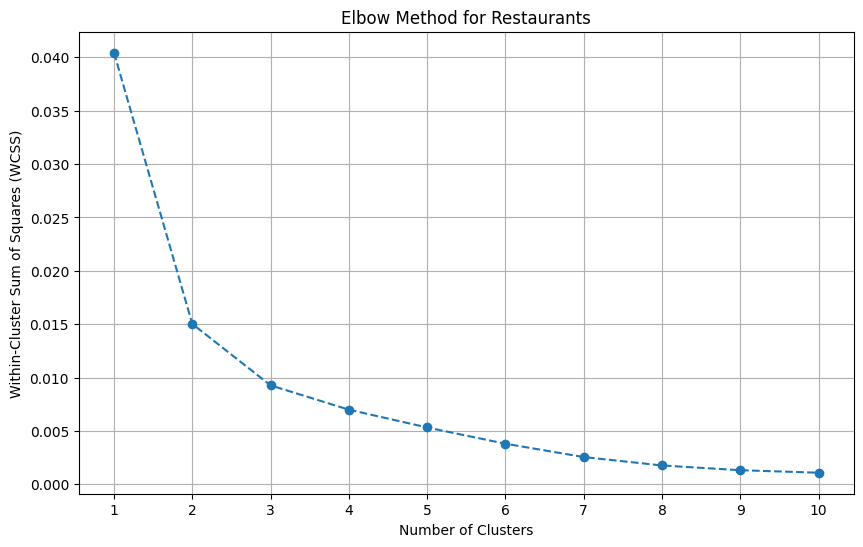

In [83]:
#Marshall
# from sklearn.cluster import KMeans


# Load the data
restaurants_df = pd.read_csv("restaurants_with_geolocation.csv")

# Keep only the latitude and longitude columns
restaurants_coords = restaurants_df[['LATITUDE', 'LONGITUDE']]

# Calculate the within-cluster sum of squares (WCSS) for different values of k
wcss = []
max_clusters = 10  # Maximum number of clusters to try
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(restaurants_coords)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Restaurants')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()


c:\Users\f33686a\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\f33686a\AppData\Local\Temp\ipykernel_33096\2790863955.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants_coords['cluster'] = kmeans.fit_predict(restaurants_coords[['LATITUDE', 'LONGITUDE']])


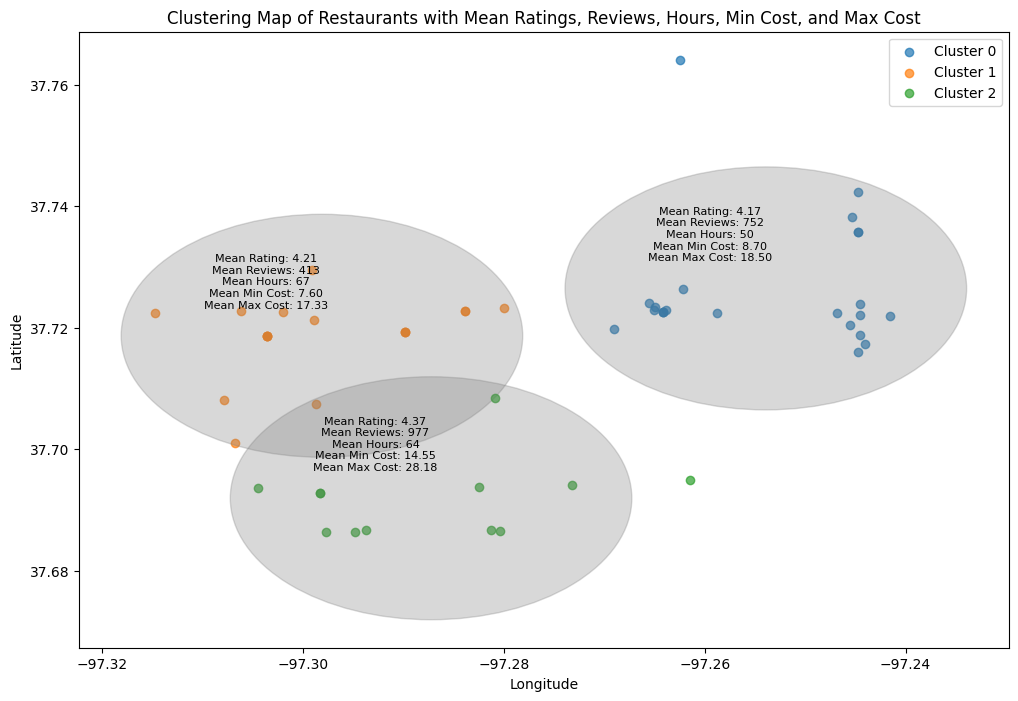

In [84]:
#Marshall
# Keep only the relevant columns
restaurants_coords = restaurants_df[['LATITUDE', 'LONGITUDE', 'RATINGS_OUTOF5', 'NUM_REVIEWS', 'TotalHours', 'MIN_COST', 'MAX_COST']]

# Perform K-means clustering
num_clusters = 3  # Number of clusters (you can adjust this as needed)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
restaurants_coords['cluster'] = kmeans.fit_predict(restaurants_coords[['LATITUDE', 'LONGITUDE']])

# Calculate mean of RATINGS_OUTOF5, NUM_REVIEWS, TotalHours, MIN_COST, and MAX_COST for restaurants within each cluster
cluster_mean_rating = []
cluster_mean_reviews = []
cluster_mean_hours = []
cluster_mean_min_cost = []
cluster_mean_max_cost = []
for cluster_id in range(num_clusters):
    cluster_restaurants = restaurants_coords[restaurants_coords['cluster'] == cluster_id]
    mean_rating = cluster_restaurants['RATINGS_OUTOF5'].mean()
    mean_reviews = cluster_restaurants['NUM_REVIEWS'].mean()
    mean_hours = cluster_restaurants['TotalHours'].mean()
    mean_min_cost = cluster_restaurants['MIN_COST'].mean()
    mean_max_cost = cluster_restaurants['MAX_COST'].mean()
    cluster_mean_rating.append(mean_rating)
    cluster_mean_reviews.append(mean_reviews)
    cluster_mean_hours.append(mean_hours)
    cluster_mean_min_cost.append(mean_min_cost)
    cluster_mean_max_cost.append(mean_max_cost)

# Plot the clustering map with circles and color-coded clusters
fig, ax = plt.subplots(figsize=(12, 8))

for cluster_id in range(num_clusters):
    cluster_data = restaurants_coords[restaurants_coords['cluster'] == cluster_id]
    ax.scatter(cluster_data['LONGITUDE'], cluster_data['LATITUDE'], alpha=0.7, label=f'Cluster {cluster_id}')
    cluster_center = kmeans.cluster_centers_[cluster_id]
    ax.add_patch(plt.Circle((cluster_center[1], cluster_center[0]), radius=0.02, color='gray', alpha=0.3))
    ax.annotate(f"Mean Rating: {cluster_mean_rating[cluster_id]:.2f}\nMean Reviews: {cluster_mean_reviews[cluster_id]:.0f}\nMean Hours: {cluster_mean_hours[cluster_id]:.0f}\nMean Min Cost: {cluster_mean_min_cost[cluster_id]:.2f}\nMean Max Cost: {cluster_mean_max_cost[cluster_id]:.2f}", 
                (cluster_center[1], cluster_center[0]), 
                xytext=(-40, 20), textcoords='offset points', ha='center', fontsize=8, color='black')

ax.set_title("Clustering Map of Restaurants with Mean Ratings, Reviews, Hours, Min Cost, and Max Cost")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()

plt.show()


## K-nearest neighbor

In [85]:
# One hot encoding for apartment and restaurant labels
apartments_geolocation['TYPE'] = 0  # One hot for apartment
restaurants_geolocation['TYPE'] = 1  # One hot for restaurant

# Concatenate the two dataframes
df = pd.concat([apartments_geolocation, restaurants_geolocation], ignore_index=True)

# Keep only 'TYPE', 'LATITUDE', and 'LONGITUDE' columns
df = df[['TYPE', 'LATITUDE', 'LONGITUDE']]

# Print latitude and longitude range
print('Latitude Range = ', df['LATITUDE'].min(), ' to ', df['LATITUDE'].max())
print('Longitude Range = ', df['LONGITUDE'].min(), ' to ', df['LONGITUDE'].max())

# Define dependent and independent variables
y = df['TYPE']  # Dependent variable
X = df[['LONGITUDE', 'LATITUDE']]  # Independent variables

Latitude Range =  37.68635693147051  to  37.764142
Longitude Range =  -97.3147997  to  -97.24159001363934


In [86]:
#Nistler
#Split data into test and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=89)

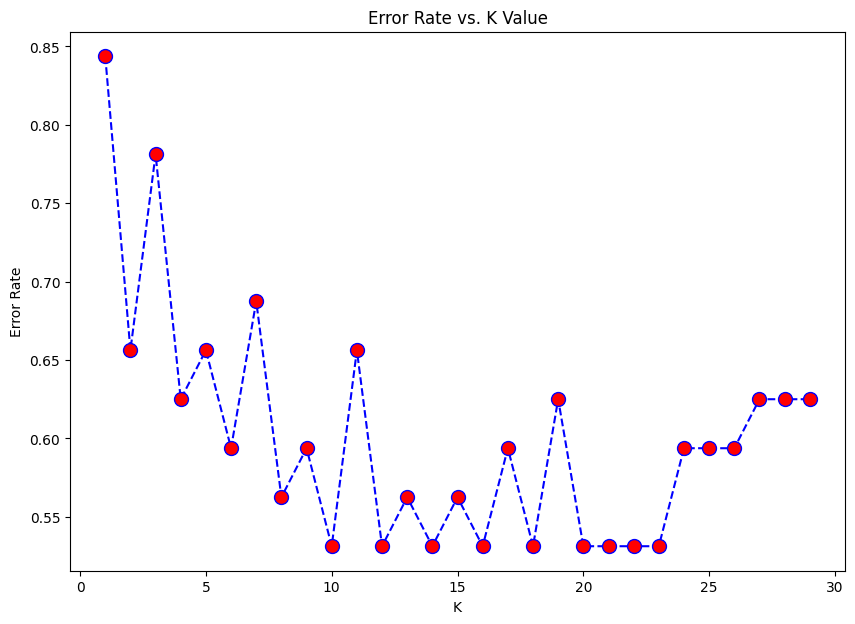

In [87]:
#Find the optimal number of neighbors
# Initialize an array that stores the error rates.
error_rates = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rates.append(np.mean(pred_i != y_test))
    
#plot error rates against number of neighbors
plt.figure(figsize=(10, 7))
plt.plot(range(1,30),error_rates,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

### Optimal K = 10

In [88]:
#Train classifier on the optimal k that we chose from the plot
k = 10 #Even though elbow plot shows 10, 4 seems to give more intuitive results
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

#Confusion matrix
cf_matrix_knn=metrics.confusion_matrix(y_test, preds)

#Performance metrics
print(metrics.confusion_matrix(y_test, preds))
print(metrics.classification_report(y_test, preds))

cohen_knn = metrics.cohen_kappa_score(y_test, preds)
print('Cohen Kappa: %.3f' % cohen_knn)

auc_score_knn = metrics.roc_auc_score(y_test,preds)
print('AUC: %.3f' % auc_score_knn)

[[11  5]
 [12  4]]
              precision    recall  f1-score   support

           0       0.48      0.69      0.56        16
           1       0.44      0.25      0.32        16

    accuracy                           0.47        32
   macro avg       0.46      0.47      0.44        32
weighted avg       0.46      0.47      0.44        32

Cohen Kappa: -0.062
AUC: 0.469


In [89]:
#Train classifier on the optimal k that we chose from the plot
k = 4 #Even though elbow plot shows 10, 4 seems to give more intuitive results
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

#Confusion matrix
cf_matrix_knn=metrics.confusion_matrix(y_test, preds)

#Performance metrics
print(metrics.confusion_matrix(y_test, preds))
print(metrics.classification_report(y_test, preds))

cohen_knn = metrics.cohen_kappa_score(y_test, preds)
print('Cohen Kappa: %.3f' % cohen_knn)

auc_score_knn = metrics.roc_auc_score(y_test,preds)
print('AUC: %.3f' % auc_score_knn)

[[10  6]
 [14  2]]
              precision    recall  f1-score   support

           0       0.42      0.62      0.50        16
           1       0.25      0.12      0.17        16

    accuracy                           0.38        32
   macro avg       0.33      0.38      0.33        32
weighted avg       0.33      0.38      0.33        32

Cohen Kappa: -0.250
AUC: 0.375


In [90]:
print('Latitude Range = ',df['LATITUDE'].min(),' to ',df['LATITUDE'].max())
print('Longitude Range = ',df['LONGITUDE'].min(),' to ',df['LONGITUDE'].max())

Latitude Range =  37.68635693147051  to  37.764142
Longitude Range =  -97.3147997  to  -97.24159001363934


In [91]:
# Create grid of all possible combinations between lat range and long range
lat,long = np.mgrid[37.66:37.77:100j, -97.37:-97.24:100j] #Complex number at the end specifies number of data points

df_to_map=pd.DataFrame()

df_to_map['LATITUDE']=lat.flatten()
df_to_map['LONGITUDE']=long.flatten()

df_to_map['RESULT']=knn.predict(df_to_map[['LONGITUDE','LATITUDE']])
df_to_map

,LATITUDE,LONGITUDE,RESULT
0,37.66,-97.370000,1
1,37.66,-97.368687,1
2,37.66,-97.367374,1
3,37.66,-97.366061,1
4,37.66,-97.364747,1
...,...,...,...
9995,37.77,-97.245253,0
9996,37.77,-97.243939,0
9997,37.77,-97.242626,0
9998,37.77,-97.241313,0


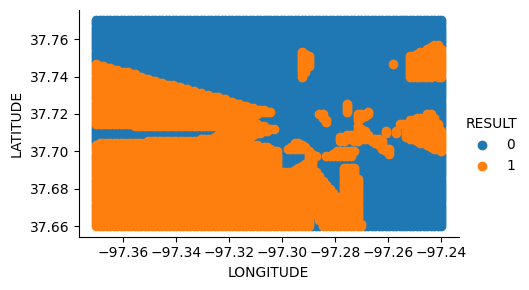

In [92]:
fg = sns.FacetGrid(data=df_to_map, hue='RESULT', aspect=1.60)
fg.map(plt.scatter, 'LONGITUDE', 'LATITUDE').add_legend()

<AxesSubplot: xlabel='LONGITUDE', ylabel='LATITUDE'>

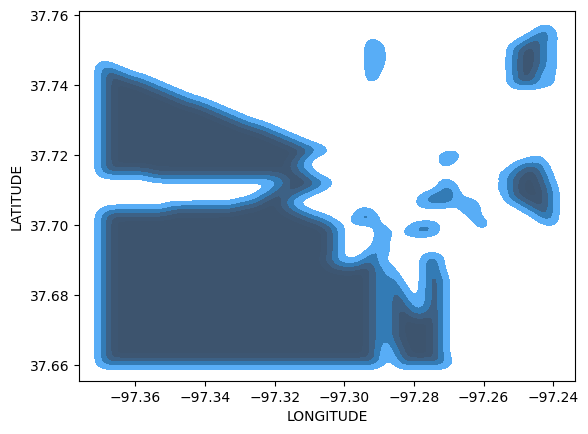

In [93]:
df_to_map_kde=df_to_map.loc[df_to_map['RESULT']==1]
sns.kdeplot(data=df_to_map_kde, x="LONGITUDE", y="LATITUDE", fill =True, levels=10, bw_adjust=0.25)

#### Tried logistic regression, naive bayes, and random forest. All had worse accuracy.

| Method | Accuracy |
|---|---|
| K Nearest Neighbors | 47% |
| Logistic Regression | 44% |
| Naive Bayes | 44% |
| Random Forest | 38% |

## Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression

lgr=LogisticRegression(max_iter=1000)
model_lrg=lgr.fit(X_train,y_train)

# Make predictions with the classifier:
y_hat = lgr.predict(X_test)

#Confusion Matrix
cf_matrix_lgr=metrics.confusion_matrix(y_test, y_hat)

# Print performance metrics
print('Accuracy Score = '+str(metrics.accuracy_score(y_test, y_hat)))
print(metrics.confusion_matrix(y_test, y_hat))
print(metrics.classification_report(y_test, y_hat))

cohen_lgr= metrics.cohen_kappa_score(y_test, y_hat)
print('Cohen Kappa: %.3f' % cohen_lgr)

auc_score_lgr = metrics.roc_auc_score(y_test,y_hat)
print('AUC: %.3f' % auc_score_lgr)

Accuracy Score = 0.4375
[[7 9]
 [9 7]]
              precision    recall  f1-score   support

           0       0.44      0.44      0.44        16
           1       0.44      0.44      0.44        16

    accuracy                           0.44        32
   macro avg       0.44      0.44      0.44        32
weighted avg       0.44      0.44      0.44        32

Cohen Kappa: -0.125
AUC: 0.438


## Naive Bayes

In [99]:
from sklearn.naive_bayes import GaussianNB

# Initialize classifier:
gnb = GaussianNB()

# Train the classifier:
model_gnb = gnb.fit(X_train, y_train)

# Make predictions with the classifier:
gnb_preds = gnb.predict(X_test)

# Confusion Matrix
cf_matrix_gnb=metrics.confusion_matrix(y_test, gnb_preds)

# Print performance metrics
print('Accuracy Score = ' + str(metrics.accuracy_score(y_test, gnb_preds)))

print(metrics.confusion_matrix(y_test, gnb_preds))

print(metrics.classification_report(y_test, gnb_preds))

cohen_gnb= metrics.cohen_kappa_score(y_test, gnb_preds)
print('Cohen Kappa: %.3f' % cohen_gnb)

auc_score_gnb = metrics.roc_auc_score(y_test,gnb_preds)
print('AUC: %.3f' % auc_score_gnb)

Accuracy Score = 0.4375
[[7 9]
 [9 7]]
              precision    recall  f1-score   support

           0       0.44      0.44      0.44        16
           1       0.44      0.44      0.44        16

    accuracy                           0.44        32
   macro avg       0.44      0.44      0.44        32
weighted avg       0.44      0.44      0.44        32

Cohen Kappa: -0.125
AUC: 0.438


## Random Forest

In [106]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1)
gs_rf = GridSearchCV(estimator=rf,
                     param_grid={'max_depth':np.arange(1,31)},
                     cv=5,
                     scoring='roc_auc')
#Train model
model_rf=gs_rf.fit(X_train,y_train)
#Make predictions
y_1 = gs_rf.predict(X_test)

diff=np.sum(y_test-y_1)
error1=diff/len(y_test)
error1

print("Accuracy score = ",metrics.accuracy_score(y_test, y_1))

score = metrics.f1_score(y_test, y_1, pos_label=1)
print('F1 Score: %.3f' % score)

cf_matrix_rf=metrics.confusion_matrix(y_test, y_1)
print(cf_matrix_rf)
print(metrics.classification_report(y_test, y_1))

cohen_rf=metrics.cohen_kappa_score(y_test, y_1)
print('Cohen Kappa: %.3f' % cohen_rf)

auc_score_rf = metrics.roc_auc_score(y_test, y_1)

print('AUC: %.3f' % auc_score_rf)

Accuracy score =  0.375
F1 Score: 0.286
[[ 8  8]
 [12  4]]
              precision    recall  f1-score   support

           0       0.40      0.50      0.44        16
           1       0.33      0.25      0.29        16

    accuracy                           0.38        32
   macro avg       0.37      0.38      0.37        32
weighted avg       0.37      0.38      0.37        32

Cohen Kappa: -0.250
AUC: 0.375
